In [5]:
from skyfield.api import load

# Load TLE data
satellites = load.tle_file('https://celestrak.com/NORAD/elements/cubesat.txt')
cute1 = [sat for sat in satellites if sat.model.satnum == 27844][0]

print(f"Satellite: {cute1}")


Satellite: CUTE-1 (CO-55) catalog #27844 epoch 2024-11-30 18:02:21 UTC


In [13]:
from skyfield.api import Topos

# Bremen coordinates
bremen = Topos('53.0793 N', '8.8017 E')

# Load time scale and find pass events
ts = load.timescale()
t0 = ts.utc(2024, 12, 1)
t1 = ts.utc(2024, 12, 24)
t, events = cute1.find_events(bremen, t0, t1, altitude_degrees=30)

# Print sightings events
for ti, event in zip(t, events):
    name = ('rise above 30°', 'culmination', 'set below 30°')[event]
    print(f"{ti.utc_iso()} {name}")

2024-12-01T06:23:17Z rise above 30°
2024-12-01T06:25:59Z culmination
2024-12-01T06:28:41Z set below 30°
2024-12-01T16:10:57Z rise above 30°
2024-12-01T16:13:27Z culmination
2024-12-01T16:15:58Z set below 30°
2024-12-02T06:00:24Z rise above 30°
2024-12-02T06:03:08Z culmination
2024-12-02T06:05:51Z set below 30°
2024-12-02T15:48:47Z rise above 30°
2024-12-02T15:50:42Z culmination
2024-12-02T15:52:38Z set below 30°
2024-12-02T17:28:56Z rise above 30°
2024-12-02T17:30:42Z culmination
2024-12-02T17:32:29Z set below 30°
2024-12-03T05:37:47Z rise above 30°
2024-12-03T05:40:12Z culmination
2024-12-03T05:42:37Z set below 30°
2024-12-03T07:19:02Z rise above 30°
2024-12-03T07:19:56Z culmination
2024-12-03T07:20:51Z set below 30°
2024-12-03T17:05:13Z rise above 30°
2024-12-03T17:07:42Z culmination
2024-12-03T17:10:12Z set below 30°
2024-12-04T05:15:40Z rise above 30°
2024-12-04T05:17:11Z culmination
2024-12-04T05:18:42Z set below 30°
2024-12-04T06:55:07Z rise above 30°
2024-12-04T06:57:15Z culmina

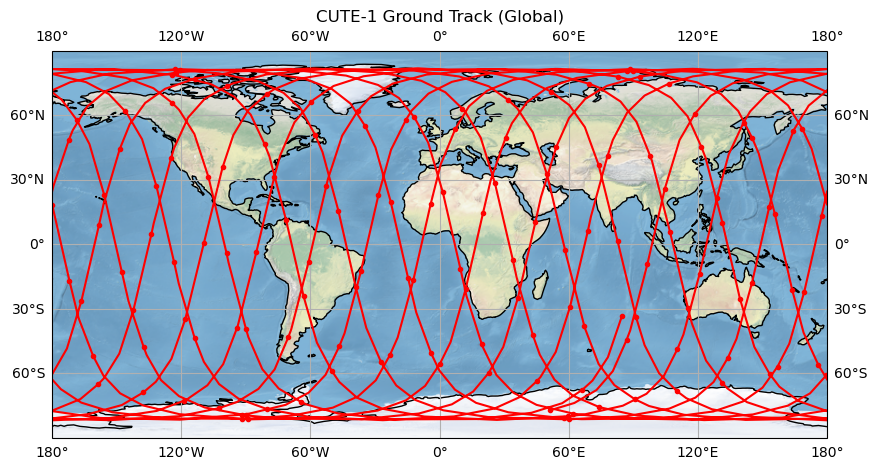

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from skyfield.api import load

# Load satellite TLE data
satellites = load.tle_file('https://celestrak.com/NORAD/elements/cubesat.txt')
cute1 = [sat for sat in satellites if sat.model.satnum == 27844][0]

# Load timescale and calculate positions
ts = load.timescale()
t = ts.utc(2024, 12, 10, 0, range(0, 1440, 10))  # One day, minute-by-minute
geocentric = cute1.at(t)
subpoint = geocentric.subpoint()

# Extract latitudes and longitudes
latitudes = subpoint.latitude.degrees
longitudes = subpoint.longitude.degrees

# Plot global map
plt.figure(figsize=(10,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.gridlines(draw_labels=True)

# Plot satellite ground track
ax.plot(longitudes, latitudes, linestyle='-', marker='.', color='red', transform=ccrs.Geodetic())
plt.title('CUTE-1 Ground Track (Global)')
plt.show()



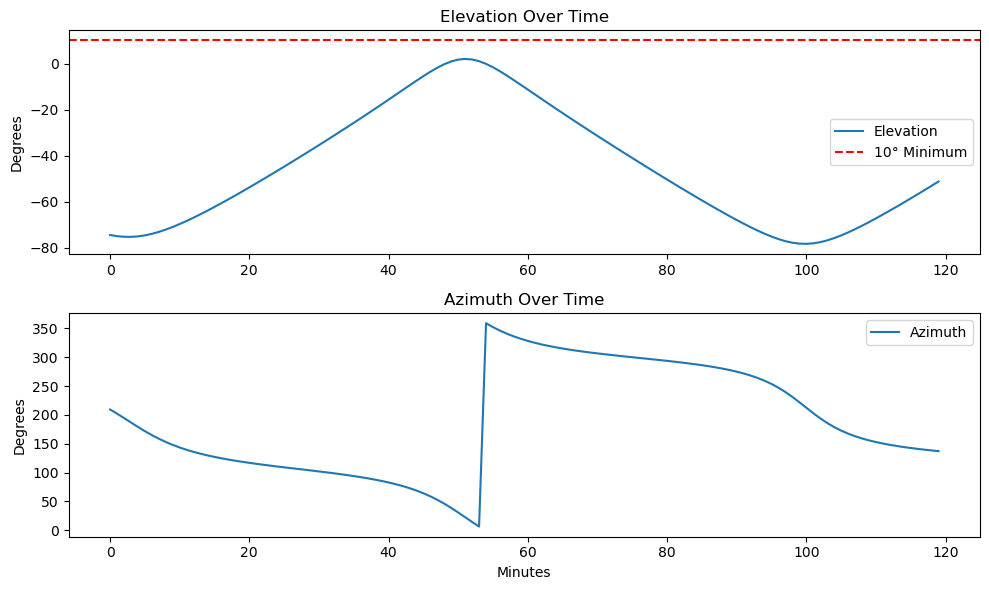

In [28]:
import numpy as np

# Observation time slot for a pass (e.g., 12:30 to 13:30 UTC on Dec 10, 2024)
observation_time = ts.utc(2024, 12, 10, 12, range(0, 120, 1))  # Two hours, minute-by-minute
difference = cute1 - bremen
alt, az, distance = difference.at(observation_time).altaz()

# Plot elevation and azimuth
time_minutes = np.arange(0, len(alt.degrees))

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(time_minutes, alt.degrees, label='Elevation')
plt.axhline(y=10, color='r', linestyle='--', label='10° Minimum')
plt.title('Elevation Over Time')
plt.ylabel('Degrees')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(time_minutes, az.degrees, label='Azimuth')
plt.title('Azimuth Over Time')
plt.xlabel('Minutes')
plt.ylabel('Degrees')
plt.legend()

plt.tight_layout()
plt.show()


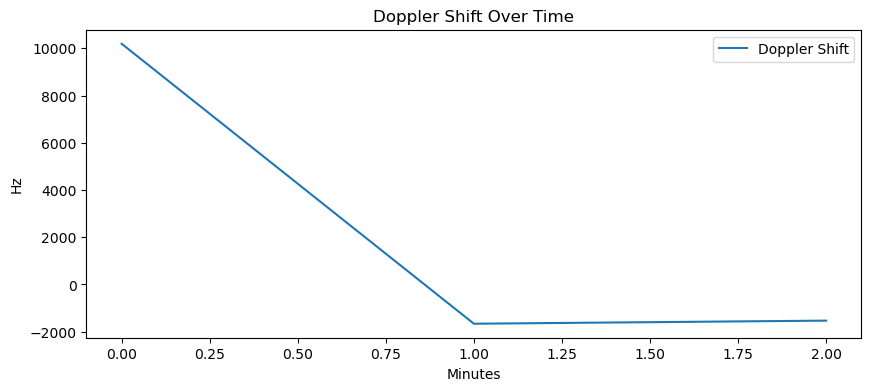

In [18]:
# Assuming relative_velocity contains all three velocity components
relative_velocity_z = relative_velocity[:, 2]  # Z-component (along line of sight)

# Now relative_velocity_z has a length that should match the number of time steps
doppler_shift = (relative_velocity_z / speed_of_light) * frequency

# Ensure time_minutes has the same length as doppler_shift for plotting
time_minutes = np.arange(0, len(doppler_shift))

# Plot the Doppler shift
plt.figure(figsize=(10, 4))
plt.plot(time_minutes, doppler_shift, label='Doppler Shift')
plt.title('Doppler Shift Over Time')
plt.xlabel('Minutes')
plt.ylabel('Hz')
plt.legend()
plt.show()



In [26]:
# Constants
k = 1.38e-23  # Boltzmann constant
bandwidth = 1e6  # 1 MHz
temperature = 290  # 290 Kelvin
noise_figure = 3  # dB
eirp = 2  # Watts (transmit power)

# Calculate noise
noise_power = 10 * np.log10(k * temperature * bandwidth)  # in dBm
receiver_noise = noise_power + noise_figure  # in dBm
print(f"Noise Power: {noise_power} dBm, Receiver Noise: {receiver_noise} dBm")

Noise Power: -143.97722915699808 dBm, Receiver Noise: -140.97722915699808 dBm


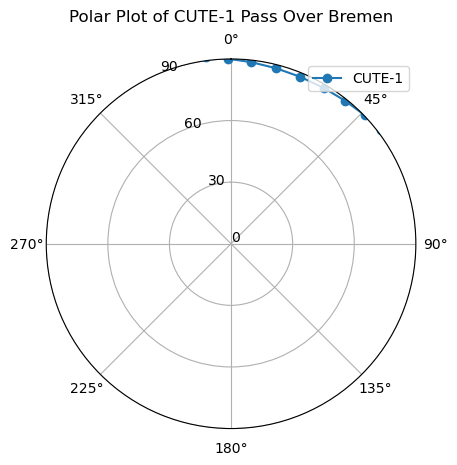

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from skyfield.api import load, Topos

# Load satellite TLE data and timescale
satellites = load.tle_file('https://celestrak.com/NORAD/elements/cubesat.txt')
cute1 = [sat for sat in satellites if sat.model.satnum == 27844][0]
ts = load.timescale()

# Define observation location and time range
bremen = Topos('53.0793 N', '8.8017 E')
observation_time = ts.utc(2024, 12, 10, 12, range(0, 60, 1))  # One hour of observation

# Calculate azimuth and elevation
difference = cute1 - bremen
alt, az, distance = difference.at(observation_time).altaz()

# Convert azimuth and elevation for polar plotting
azimuth_radians = az.degrees * np.pi / 180  # Convert azimuth to radians
elevation_polar = 90 - alt.degrees  # Invert elevation for polar plot (90° at center)

# Create the polar plot
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.set_theta_zero_location("N")  # North is at the top
ax.set_theta_direction(-1)  # Azimuth angles increase clockwise
ax.plot(azimuth_radians, elevation_polar, marker='o', label='CUTE-1')

# Set radial limits and ticks
ax.set_rmax(90)
ax.set_rticks([0, 30, 60, 90])  # Radial ticks for elevation (inverted scale)
ax.set_rlabel_position(-22.5)  # Move radial labels to avoid overlapping
ax.set_title("Polar Plot of CUTE-1 Pass Over Bremen", va='bottom')
ax.legend(loc='upper right')

# Show the plot
plt.show()


In [10]:
from skyfield.api import load

# Load the TLE data from CelesTrak CubeSat catalog
satellites = load.tle_file('https://celestrak.com/NORAD/elements/cubesat.txt')

# Filter the satellite by its NORAD ID (27844) or the name 'CUTE-1 (CO-55)'
cute1 = [sat for sat in satellites if sat.model.satnum == 27844][0]

# Print the TLE data for CUTE-1 (CO-55) in the specified format
print(f"{cute1}")



CUTE-1 (CO-55) catalog #27844 epoch 2024-11-30 18:02:21 UTC
